In [ ]:
install.packages("tidyverse")
remotes::install_github("bradleyboehmke/harrypotter")
install.packages("tidytext")
library(tidyverse)
library(stringr)
options(jupyter.rich_display=T)
library(harrypotter)
library(tidytext)
options(repr.plot.width=4, repr.plot.height=3)

# STATS 306
## Homework 7: Text Analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Sentiment Analysis (4 points)

In problem 1 we will perform *sentiment analysis* of the Harry Potter books. The file `afinn.RData` contains a sentiment score for a large number of words in the English language:

In [ ]:
load(url("https://datasets.stats306.org/afinn.RData"))
head(afinn)

Negatively connoted words receive low scores, while positively connoted words receive high scores:

In [ ]:
filter(afinn, word %in% c("death", "hurrah"))

The `tidytext::unnest_tokens()` function can be used to break a chunk of text into "tokens" (words, sentences, etc.) It works as follows. Consider the following tibble, which contains all 17 chapters of the first book in the Harry Potter series:

In [ ]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone) %>% print

To perform sentiment analysis, we need to break each chapter into words so that we can join it to the `afinn` table. This is what `unnest_tokens()` does:

In [ ]:
phil_tok <- unnest_tokens(phil_tbl, input=text, output=word) %>% print

**1(a)** By joining this table to other tables containing text data and summarizing, we can generate scores of how positive or negative the text is. Using the table and `afinn`, we can assign sentiment scores to various portions of text. Generate a plot reflecting how the sentiment changes over 17 chapters of the first book in the Harry Potter series. What conclusion can you draw from the plot? (1 point)

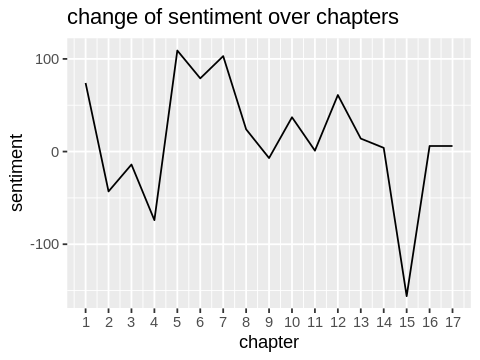

In [25]:
### YOUR SOLUTION HERE
phil_tok %>% left_join(afinn, by = "word") %>%
  filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>%
  ggplot(aes(x = chapter, y = sum)) +
  geom_line() + 
  ylab("sentiment") +
  labs(title = "change of sentiment over chapters") +
  scale_x_continuous(breaks = seq(0,17, by = 1))

# conclusion: sentiment did not really had trend, as it increase at some point and decrease at some point
# chapter with most positive sentiments was chapter 5, and most negative sentiments was chapter 15

**1(b)**
Some people say that the Harry Potter books became darker (more negative) over time. Use sentiment analysis to investigate this, and report your conclusion here. (1 point)

**HINT**: A list of all the Harry Potter books can be obtained by looking at the help page for the `harrypotter` package.

In [309]:
### YOUR SOLUTION HERE
a1 <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone)
a2 <- unnest_tokens(a1, input=text, output=word) 

a3 <- a2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))


b1 <- tibble(chapter=seq_along(chamber_of_secrets), 
                   text=chamber_of_secrets)
b2 <- unnest_tokens(b1, input=text, output=word) 

b3 <- b2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))


c1 <- tibble(chapter=seq_along(prisoner_of_azkaban), 
                   text=prisoner_of_azkaban)
c2 <- unnest_tokens(c1, input=text, output=word) 

c3 <- c2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))


d1 <- tibble(chapter=seq_along(goblet_of_fire), 
                   text=goblet_of_fire)
d2 <- unnest_tokens(d1, input=text, output=word) 

d3 <- d2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))


e1 <- tibble(chapter=seq_along(order_of_the_phoenix), 
                   text=order_of_the_phoenix)
e2 <- unnest_tokens(e1, input=text, output=word) 

e3 <- e2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))


f1 <- tibble(chapter=seq_along(half_blood_prince), 
                   text=half_blood_prince)
f2 <- unnest_tokens(f1, input=text, output=word) 

f3 <- f2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))


g1 <- tibble(chapter=seq_along(deathly_hallows), 
                   text=deathly_hallows)
g2 <- unnest_tokens(g1, input=text, output=word) 

g3 <- g2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  summarise(sum = sum(value))

bind_rows(a3, b3, c3, d3, e3, f3, g3)

#it is true that 7th book of the series had most negative sentiment score, and over all trend of series
#went to more negative, but not all the time. from book 3 to 4 and 6 to 7, sentiment score increased instead


Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`


sum
<dbl>
224
-188
-340
-169
-720
330
-2265


**1(c)** According to the sentiment scores, what are the most negative and positive chapters in any of the Harry Potter books? (1 point)

In [214]:
### YOUR SOLUTION HERE
a2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 15, most positive = chapter 5

b2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 17, most positive = chapter 6


c2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 17, most positive = chapter 22


d2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 35, most positive = chapter 23


e2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 35, most positive = chapter 16


f2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 28, most positive = chapter 9

g2 %>% left_join(afinn) %>% filter(!is.na(value)) %>%
  group_by(chapter) %>%
  summarise(sum = sum(value)) %>% filter(sum == min(sum) | sum == max(sum)) %>% 
  arrange(sum)

#most negative = chapter 5 & 23, most positive = chapter 8

Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
15,-156
5,109


Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
17,-95
6,83


Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
17,-147
22,110


Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
35,-207
23,195


Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
35,-213
16,120


Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
28,-232
9,210


Joining with `by = join_by(word)`


chapter,sum
<int>,<dbl>
5,-211
23,-211
8,85


**1(d)** Of the sentences that contain three or more scored words, what is the happiest (most positive)? (1 points)

In [262]:
### YOUR SOLUTION HERE

## Problem 2: Reddit dataset (4 points)
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017. Unless specified otherwise, all matches are case insensitive.

In [85]:
load(url('https://datasets.stats306.org/reddit_xmas_2017.RData'))
reddit %>% print

# A tibble: 100,000 × 3
   author              body                                  created_utc        
   <chr>               <chr>                                 <dttm>             
 1 br_shadow           "Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              "They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           "tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech … 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "   2017-12-25 20:58:08
 6 Shadrac121          "Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  "Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but if… 2017-12-25 19:28:35
 9 AabidS10            "i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandals… 2017-12-25 00:48:46
# … 

Comment 174 wishes everyone a happy holidays:

In [ ]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


**2(a)**  What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches. To keep things interesting, do *not* include phrases matching `(happy|merry) (to|with|for|about|and|that|if|i|you|when)`. 

Print a table containing the top 10 matches; a few of the rows are:

<table>
<thead>
    <tr><th scope="col">greeting</th><th scope="col">n</th></tr>
    <tr><th scope="col">&lt;chr&gt;</th><th scope="col">&lt;int&gt;</th></tr>
</thead>
<tbody>
    <tr><td>merry christmas</td><td>2040</td></tr>
    <tr><td>happy holidays </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td>   7</td></tr>
    <tr><td>happy cakeday  </td><td>   6</td></tr>
</tbody>
</table>

Your numbers may vary slightly depending on how you performed the match.

In [370]:
### YOUR SOLUTION HERE
abc <- reddit %>% 
  mutate(body = str_to_lower(body)) %>% 
    filter(str_detect(body, "happy+\\b\\s+\\b\\w")) %>% 
    mutate(greeting = str_extract(body, "happy+\\b\\s+\\b\\w+")) %>%
    group_by(greeting) %>%
    summarise(n = n()) %>% arrange(desc(n))
  
def <- reddit %>% 
  mutate(body = str_to_lower(body)) %>% 
    filter(str_detect(body, "merry+\\b\\s+\\b\\w")) %>% 
    mutate(greeting = str_extract(body, "merry+\\b\\s+\\b\\w+")) %>%
    group_by(greeting) %>%
    summarise(n = n()) %>% arrange(desc(n))
  

bind_rows(abc, def) %>% arrange(desc(n)) %>% slice(1:10)

greeting,n
<chr>,<int>
merry christmas,2070
happy holidays,521
happy to,103
happy with,94
merry xmas,94
happy christmas,44
happy new,39
happy for,38
happy cake,29


**2(b)** Find the number of times `christmas`or `xmas` mentioned each hour. Similarly, find the number of mentions per hour of `snow` or `flakes`. Draw a plot comparing these two time series. (1 point)

In [ ]:
install.packages("lubridate")   
library("lubridate")

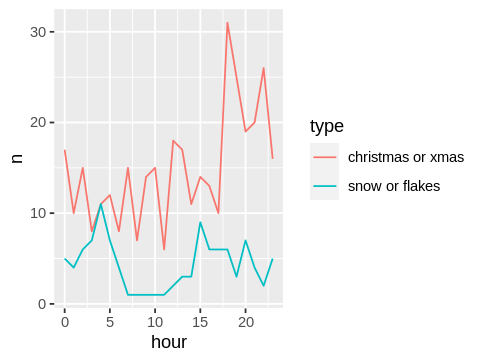

In [148]:
### YOUR SOLUTION HERE
aaa <- reddit %>% mutate(hour = hour(created_utc)) %>% 
  filter(str_detect(body, "(christmas | xmas)")) %>%
  group_by(hour) %>% summarise(n = sum(str_count(body, "(christmas | xmas)")))
  

bbb <- reddit %>% mutate(hour = hour(created_utc)) %>% 
  filter(str_detect(body, "(snow | flakes)")) %>%
  group_by(hour) %>% summarise(n = sum(str_count(body, "(snow | flakes)")))

bind_rows(aaa %>% mutate(type = "christmas or xmas"),
          bbb %>% mutate(type = "snow or flakes")) %>% 
  ggplot(aes(x = hour, y = n, color = type)) +
  geom_line()

**2(c)** On Christmas Day, the word `christmas` occurs 4264 times. What is the next most common word after Christmas, and how many times does it appear? (1 point)

In [177]:
### YOUR SOLUTION HERE
reddit %>% mutate(body = str_to_lower(body)) %>% 
  mutate(word = str_extract_all(body, "\\w+")) %>%
  select(word) %>% 
  unnest(word) %>% 
  count(word, sort = TRUE) %>% filter(n < 4300) %>% print

#only is the next most common words, 4151 times

# A tibble: 86,997 × 2
   word          n
   <chr>     <int>
 1 christmas  4265
 2 only       4151
 3 am         4026
 4 then       3992
 5 been       3929
 6 ve         3881
 7 please     3861
 8 also       3823
 9 than       3695
10 too        3643
# … with 86,987 more rows


**2(d)** Using `afinn` dataset, calculate the average sentiment scores of reddit comments for each hour. When is the most positive time in Christmas Day? (1 point)

In [193]:
### YOUR SOLUTION HERE
reddit %>% 
  mutate(hour = hour(created_utc)) %>% 
  group_by(hour) %>%
  mutate(word = str_extract_all(body, "\\w+")) %>%
  select(word) %>% 
  unnest(word) %>% group_by(hour, word) %>% 
  summarise %>%
  left_join(afinn) %>% 
  filter(!is.na(value)) %>% group_by(hour) %>% 
  summarise(sum = sum(value))  %>% arrange(desc(sum))

# most positive at 11am

Adding missing grouping variables: `hour`
`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.
Joining with `by = join_by(word)`


hour,sum
<int>,<dbl>
11,60
7,-1
10,-12
8,-18
9,-20
6,-32
13,-42
12,-48
5,-64


## Challenge Problem: Text Ranking (2 points)
Not all terms/words are equally important, and some carry more information about contents. But how do we measure the importance? One popular method is using TF-IDF (term frequency–inverse document frequency). TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Term Frequency measures the relative frequency of term within document. Inverse Document Frequency measures of how much information the word provides for the collection. 

We defined TF-IDF as:
$$\text{TF-IDF} = \operatorname{TF}(t,d) \times \operatorname{IDF}(t)$$
$$\operatorname{TF}(t, d) = \log(1+c(t,d))$$
$$\operatorname{IDF}(t) = 1 + \log(N/k)$$
where $c(t,d)$ is the frequency count of term $t$ in document $d$, $N$ is the total number of documents in the collection, $k$ is the number
of documents containing term $t$


**(a)** Consider the Harry Potter series as a collection of documents(books), find top 5 words in each book ranked by TF-IDF. Comment on your finding. (1 point) 

_Hint_: You can either compute this by hand, using the definitions shown above, or employ built-in functions in the `tidytext` package.

In [292]:
library(janeaustenr)

In [ ]:

book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)



book_words %>%
  bind_tf_idf(word, book, n) %>%
  arrange(desc(tf_idf))


In [308]:
### YOUR SOLUTION 

a <- tibble(title = "1", text = philosophers_stone) %>% unnest_tokens(word, text) 
b <- tibble(title = "2", text = chamber_of_secrets) %>% unnest_tokens(word, text) 
c <- tibble(title = "3", text = prisoner_of_azkaban) %>% unnest_tokens(word, text) 
d <- tibble(title = "4", text = goblet_of_fire) %>% unnest_tokens(word, text) 
e <- tibble(title = "5", text = order_of_the_phoenix) %>% unnest_tokens(word, text) 
f <- tibble(title = "6", text = half_blood_prince) %>% unnest_tokens(word, text) 
g <- tibble(title = "7", text = deathly_hallows) %>% unnest_tokens(word, text) 

h <- bind_rows(a,b,c,d,e,f,g)

h1 <- h %>% count(title, word, sort = T)

h2 <- h1 %>%
  bind_tf_idf(word, title, n) %>%
  arrange(desc(tf_idf)) 


h2 %>% filter(title == '1') %>% slice(1:5)
#book 1 = quirrell, mom, flamel, quirrell's, nicolas

h2 %>% filter(title == '2') %>% slice(1:5)
#book 2 = lockhart, gilderoy, dobby, myrtle, riddle

h2 %>% filter(title == '3') %>% slice(1:5)
#book 3 = lupin, pettigrew, marge, black's, scabbers

h2 %>% filter(title == '4') %>% slice(1:5)
#book 4 = bagman, winky, champions, ludo, karkaroff

h2 %>% filter(title == '5') %>% slice(1:5)
#book 5 = umbridge, towards, defence, luna, umbridge's

h2 %>% filter(title == '6') %>% slice(1:5)
#book 6 = slughorn, mclaggen, morfin, slughorn's, quot

h2 %>% filter(title == '7') %>% slice(1:5)
#book 7 = c, xenophilius, griphook, hallows, horcrux


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,quirrell,90,0.0011556982,0.5596158,0.0006467470
1,mom,17,0.0002182986,1.9459101,0.0004247894
1,flamel,25,0.0003210273,1.2527630,0.0004021711
1,quirrell's,22,0.0002825040,1.2527630,0.0003539106
1,nicolas,16,0.0002054575,1.2527630,0.0002573895


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
2,lockhart,197,0.0023067646,0.5596158,0.0012909019
2,gilderoy,38,0.0004449597,1.2527630,0.0005574290
2,dobby,139,0.0016276156,0.3364722,0.0005476475
2,myrtle,47,0.0005503448,0.8472979,0.0004663060
2,riddle,101,0.0011826559,0.3364722,0.0003979309


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
3,lupin,369,0.0035051057,0.3364722,0.0011793707
3,pettigrew,88,0.0008359060,0.8472979,0.0007082613
3,marge,52,0.0004939444,0.8472979,0.0004185181
3,black's,47,0.0004464498,0.8472979,0.0003782759
3,scabbers,106,0.0010068867,0.3364722,0.0003387894


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
4,bagman,208,0.0010839995,1.2527630,0.0013579945
4,winky,145,0.0007556728,1.2527630,0.0009466788
4,champions,84,0.0004377690,1.9459101,0.0008518592
4,ludo,71,0.0003700191,1.9459101,0.0007200239
4,karkaroff,141,0.0007348266,0.8472979,0.0006226170


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
5,umbridge,496,0.0019168119,0.8472979,0.0016241106
5,towards,268,0.0010356968,0.5596158,0.0005795923
5,defence,66,0.0002550596,1.9459101,0.0004963232
5,luna,139,0.0005371711,0.8472979,0.0004551439
5,umbridge's,73,0.0002821114,1.2527630,0.0003534188


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
6,slughorn,335,0.0019558161,1.252763,0.0024501739
6,mclaggen,65,0.0003794867,1.945910,0.0007384470
6,morfin,57,0.0003327806,1.945910,0.0006475612
6,slughorn's,53,0.0003094276,1.945910,0.0006021183
6,quot,43,0.0002510450,1.945910,0.0004885111


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
7,c,1300,0.0065357506,0.3364722,0.0021990986
7,xenophilius,79,0.0003971725,1.9459101,0.0007728621
7,griphook,117,0.0005882175,1.2527630,0.0007368972
7,hallows,67,0.0003368425,1.9459101,0.0006554653
7,horcrux,93,0.0004675575,1.2527630,0.0005857388


**(b)** Stop words are a set of commonly used words in a language like "the", "of", "and", "to", "a". The `stop_words` table contains a list of such words. If you ignore all the words in `stop_words`, what are the top 10 words (again ranked by TF-IDF) in each Harry Potter book? (1 point)

_Hint_: use `anti_join` to exclude words in `stop_words`.

In [318]:
### YOUR SOLUTION HERE

h3 <- h1 %>% anti_join(stop_words) %>%
  bind_tf_idf(word, title, n) %>%
  arrange(desc(tf_idf)) 


h3 %>% filter(title == '1') %>% slice(1:10)
#answer in table

h3 %>% filter(title == '2') %>% slice(1:10)
#answer in table

h3 %>% filter(title == '3') %>% slice(1:10)
#answer in table

h3 %>% filter(title == '4') %>% slice(1:10)
#answer in table

h3 %>% filter(title == '5') %>% slice(1:10)
#answer in table

h3 %>% filter(title == '6') %>% slice(1:10)
#answer in table

h3 %>% filter(title == '7') %>% slice(1:10)
#answer in table

Joining with `by = join_by(word)`


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,quirrell,90,0.0031485045,0.5596158,0.0017619528
1,mom,17,0.0005947175,1.9459101,0.0011572668
1,flamel,25,0.0008745846,1.2527630,0.0010956472
1,quirrell's,22,0.0007696344,1.2527630,0.0009641695
1,nicolas,16,0.0005597341,1.2527630,0.0007012142
1,piers,15,0.0005247507,1.2527630,0.0006573883
1,turban,14,0.0004897674,1.2527630,0.0006135624
1,ronan,20,0.0006996677,0.8472979,0.0005928269
1,chessmen,8,0.0002798671,1.9459101,0.0005445962


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
2,lockhart,197,0.0058594331,0.5596158,0.0032790313
2,gilderoy,38,0.0011302460,1.2527630,0.0014159303
2,dobby,139,0.0041343208,0.3364722,0.0013910842
2,myrtle,47,0.0013979358,0.8472979,0.0011844680
2,riddle,101,0.0030040748,0.3364722,0.0010107878
2,lockhart's,36,0.0010707593,0.8472979,0.0009072521
2,riddle's,33,0.0009815294,0.8472979,0.0008316478
2,kwikspell,12,0.0003569198,1.9459101,0.0006945338
2,stall,12,0.0003569198,1.9459101,0.0006945338


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
3,lupin,369,0.008958920,0.3364722,0.0030144279
3,pettigrew,88,0.002136545,0.8472979,0.0018102897
3,marge,52,0.001262504,0.8472979,0.0010697166
3,black's,47,0.001141109,0.8472979,0.0009668593
3,scabbers,106,0.002573565,0.3364722,0.0008659332
3,dementors,95,0.002306497,0.3364722,0.0007760722
3,boggart,36,0.000874041,0.8472979,0.0007405731
3,crookshanks,90,0.002185102,0.3364722,0.0007352263
3,ern,24,0.000582694,1.2527630,0.0007299775


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
4,bagman,208,0.0028625298,1.2527630,0.003586071
4,winky,145,0.0019955135,1.2527630,0.002499905
4,champions,84,0.0011560216,1.9459101,0.002249514
4,ludo,71,0.0009771135,1.9459101,0.001901375
4,karkaroff,141,0.0019404649,0.8472979,0.001644152
4,krum,190,0.0026148108,0.5596158,0.001463289
4,moody,309,0.0042525082,0.3364722,0.001430851
4,maxime,93,0.0012798811,0.8472979,0.001084441
4,cedric,225,0.0030964865,0.3364722,0.001041882


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
5,umbridge,496,0.0051251847,0.8472979,0.0043425580
5,defence,66,0.0006819802,1.9459101,0.0013270722
5,luna,139,0.0014362917,0.8472979,0.0012169669
5,umbridge's,73,0.0007543115,1.2527630,0.0009449735
5,sirius,588,0.0060758238,0.1541507,0.0009365924
5,tonks,101,0.0010436364,0.8472979,0.0008842709
5,kreacher,100,0.0010333034,0.8472979,0.0008755157
5,realised,50,0.0005166517,1.2527630,0.0006472421
5,forwards,68,0.0007026463,0.8472979,0.0005953507


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
6,slughorn,335,0.0053092016,1.2527630,0.0066511711
6,mclaggen,65,0.0010301436,1.9459101,0.0020045669
6,morfin,57,0.0009033567,1.9459101,0.0017578509
6,slughorn's,53,0.0008399632,1.9459101,0.0016344930
6,quot,43,0.0006814796,1.9459101,0.0013260981
6,ogden,61,0.0009667501,1.2527630,0.0012111088
6,felix,31,0.0004912992,1.9459101,0.0009560242
6,merope,31,0.0004912992,1.9459101,0.0009560242
6,scrimgeour,69,0.0010935370,0.8472979,0.0009265516


title,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
7,xenophilius,79,0.0010762063,1.9459101,0.002094201
7,griphook,117,0.0015938752,1.2527630,0.001996748
7,hallows,67,0.0009127319,1.9459101,0.001776094
7,horcrux,93,0.0012669264,1.2527630,0.001587158
7,luna,120,0.0016347438,0.8472979,0.001385115
7,kreacher,119,0.0016211209,0.8472979,0.001373572
7,greyback,66,0.0008991091,1.2527630,0.001126371
7,diadem,42,0.0005721603,1.9459101,0.001113373
7,ariana,41,0.0005585374,1.9459101,0.001086864
